In [16]:
import pandas as pd

%matplotlib inline

In [2]:
%%time

df = pd.read_csv(
    "../data/documenten_ph/DB_V2.TXT",
    encoding="latin_1",
#     nrows=1000,
    sep="\t"
)

<string>:2: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 28.1 s, sys: 2.98 s, total: 31.1 s
Wall time: 31.2 s


In [3]:
df.head()

,account_yy_ss,Province,Type,hosp_serv_id,reimbt_cat_id,drug_code,realization_date,quantity,amount_reimb,amount_not_reimb,Year
0,20026,Anvers,Général,990,698014,0,20014,1,218.10,0.0,2002
1,20026,Anvers,Général,990,698051,0,20014,3,5816.01,0.0,2002
2,20027,Anvers,Général,990,698051,0,20014,1,51.83,0.0,2002
3,20026,Anvers,Général,990,698051,0,20021,2,535.21,0.0,2002
4,20027,Anvers,Général,990,698051,0,20021,1,267.61,0.0,2002


In [6]:
df.Province.value_counts()

Anvers                 3552036
Bruxelles-Capitale     3373238
Flandre orientale      3144348
Flandre Occidentale    2952424
Hainaut                2795325
Liège                  2777233
Brabant Flamand        2215797
Limbourg               1994491
Namur                  1490642
Brabant Wallon          887922
Luxembourg              825853
Name: Province, dtype: int64

In [20]:
df.Type.value_counts()

Général          23656789
Psychiatrique     2352520
Name: Type, dtype: int64

In [21]:
df.drug_code.value_counts()

0          257899
7799992     50643
819094      48039
729780      43507
726885      43504
819102      41985
740936      39683
744987      38986
746792      38394
733543      38297
730002      37688
1449842     37624
740951      36434
1204973     35224
98194       34990
718056      34600
1112598     34379
1205749     34154
39347       33166
771600      33146
773390      33128
106591      32904
726737      32667
740944      32439
710350      32328
1278266     32200
765115      32179
745612      32131
705350      32093
741033      31839
            ...  
376368          1
1846369         1
1846138         1
1845650         1
379297          1
0737783         1
6031470         1
0087643         1
1879212         1
324947          1
330290          1
0784215         1
1281476         1
0785550         1
325811          1
327978          1
328260          1
328275          1
1736545         1
1912519         1
0780155         1
0744888         1
0790238         1
0786020         1
1884027   

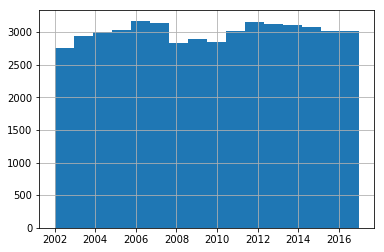

In [22]:
df[df.drug_code == 819094].Year.hist(bins=16)

In [23]:
groups = df.groupby(["drug_code", "Year"]).agg({"quantity": "sum"})

quantity
drug_code Year          
0         2002    599414
          2003   2080384
          2004   3398120
          2005   3932467
          2006   4939636

In [27]:
groups.head(50)

quantity
drug_code Year          
0         2002    599414
          2003   2080384
          2004   3398120
          2005   3932467
          2006   4939636
          2007   5582038
          2008   5252904
          2009   4661726
          2010   4093353
          2011   6131041
          2012   7289715
          2013   9169865
          2014  10062335
          2015  10964572
          2016  10397578
          2017  10946203
1         2002         1
11        2004         1
19        2004         1
24        2002         4
30        2003         1
32        2002         3
34        2002        60
          2011       154
42        2004         5
          2007         1
          2011         2
          2012         2
45        2002         1
59        2002         2
          2003         2
73        2002         2
75        2002         1
          2003         1
          2007         1
81        2002         4
          2003         1
82        2002         4
83        2002       199
          2003       172
          2004         9
          2005         2
91        2002        49
          2003        21
          2004        59
95        2002         3
          2003         2
109       2004         1
166       2004         1
          2005         1